<p style="font-family: helvetica,arial,sans-serif; font-size:2.0em;color:white; background-color: black">&emsp;<b>Melbourne Pedestrian Network Routes and Road Safety: Part 2</b></p>
    
<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Authored by: </b> Bree McLennan and Jack Pham</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black; text-align:right"><b>Duration:</b> 120 mins&emsp;</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Level: </b>Intermediate&emsp;&emsp;<b>Pre-requisite Skills:</b>&emsp;&emsp;Python, Data engineering and analysis</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Scenario</b>

**From a citizen and pedestrian perspective:** We want a safe journey in Melbourne. Which intersections are safest and which are the riskiest from a road safety perspective? Where are accident hot-spots occurring and under what circumstance? 

**From a council perspective:** As a council we want to invest in road safety initiatives which can effectively reduce serious injuries and fatalities. Are the current approaches to road network design having the impact we expected?

This use case is an extension from the Melbourne Bicycle Network Route & Road Safety analysis that was created in Trimester 1 2022. We can utilise the VicRoads traffic accident data and aggregate this with the pedestrian paths Melbourne open dataset.

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Objectives for the Exploratory Data Analysis Part II</b>

Using the power of data aggregation, we can combine Melbourne Open datasets such as transport networks and events
With open government datasets including traffic accident ‘crash stats’ from Victoria Police and traffic event data from VicRoads and begin to observe, analyze and report on geographical patterns between these datasets.

We can ask questions such as:

1. Pedestrian accidents occurring on designated footpath areas or on different areas? Where, specifically? And Why?
2. What are the accident circumstances? 
3. Do accidents co-occur with road-works, weather events or other disruptive events?


Goals for exploratory data analysis:

1. Analysis on the relationship between crashes and rain
2. The relationship between the pedestrian age and the severity of the accident
3. Rwhat times of the day we have the hightest frequency of seriously injuried pedestrian
4. Plot different types of maps


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Strategic benefits for City of Melbourne
</b>

This use case and exploratory data analysis project can support the City of Melbourne in the following ways:

1. Support for the ‘Safety and Well-being’ strategic vision and goals

2. Influence the creation of a ‘key risk indicator’ to monitor progress on the reduction of the 'Number of transport-related injuries and fatalities’ on Melbourne roads

3. Support further discussion between City of Melbourne and Victorian Road Safety partner agencies to improve road network design and infrastructure programs

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Background on Related Road Safety Initiatives in Victoria</b>

To cite some key pedestrian road safety statistics, sourced from the Transport Accident Commission:

In the last five years, 175 pedestrians have been killed on Victorian roads. There are many more who are injured or seriously injured. Pedestrians make up around 15% of the total number of road deaths each year. 

-	Just over one third (36%) are aged 70+
-	Two thirds (67%) are male
-	Almost four in ten (38%) are killed on 60km/h roads
    -	Pedestrian deaths still occur in areas of 40km/h and 50km/h zones.
-	70% are killed in Metro Melbourne
-	One third of fatal accidents involve the pedestrian crossing the street and being struck by a vehicle.

The approach to aggregating key data sources and analysing geographical attributes is currently used by the TAC (Transport Accident Commission) in Victoria when analysing accident hot-spots and reviewing whether the design of the road could be improved to reduce road trauma. 
    
This type of analysis was used by TAC in recent years to assess fatal accident hotspots in Geelong.

The TAC in partnership with the Victorian Road Safety parntering agencies discovered a cluster of fatal accidents occurring over a 5-year period along a specific stretch of road at Thompsons Road, North Geelong.
    
The analysis informed a strategic decision for road safety partners (Victoria Police, VicRoads, City of Greater Geelong, TAC) to re-design the road to make it safer.
    
The road re-design has resulted in a substantial reduction in road trauma along Thompsons Road in North Geelong.

A similar analysis technique and approach could be applied to the City of Melbourne road network


**REFERENCE:**

[1] https://regionalroads.vic.gov.au/map/barwon-south-west-improvements/thompson-road-safety-improvements


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;
<b>Exploratory Data Analysis Worflow Steps</b></p>

1. Document the data considerations and risk assessments

2. Prepare the Traffic Accident 'crash-stats' source data (this is handled by a separate python notebook)

3. Access and read-in the Melbourne Pedestrian Network dataset via the SOCRATA API

4. Explore the Melbourne Pedestrian Newtwork dataset as a geoJSON file

5. Read-in the pre-processed Traffic Accident 'crash-stats' dataset

6. Explore the Traffic Accident 'crash-stats' dataset

7. Visualise the geographical features of the Melbourne Pedestrian Network overlayed with Traffic Accident 'crash-stats' dataset

**Dataset list:**
1. Melbourne Open Data Pedestrian Network
2. VicRoads Accident data

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;Setting Up for Analysis</b>

To begin the analysis we first import the necessary libraries to support our exploratory data analysis using Melbourne Open data.

The following are core packages required for this exercise:

- json // Assists with parsing JSON (JavaScript Object Notation) from strings or files.
- folium // Assists with visualising data that's been manipulated in Python on an interactive leaflet map.
- seaborn // Assists with visualization of data. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [1]:
###################################################################
# Libraries used for this use case and exploratory data analysis
###################################################################
!pip install sodapy
!pip install geopandas
!pip install pygeos
!pip install mapclassify
import os
import time
import sys
sys.path.insert(1, '../') # so that we can import d2i_tools from the parent folder.
#from d2i_tools2 import *
import warnings
warnings.simplefilter("ignore")

from datetime import datetime, date
import numpy as np
import pandas as pd
from sodapy import Socrata
import json
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import pygeos
import mapclassify
import pyproj
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To connect to the Melbourne Open Data Portal we must establish a connection using the sodapy library by specifying a domain, being the website domain where the data is hosted, and an application access token which can be requested from the City of Melbourne Open Data portal by registering __[here](https://data.melbourne.vic.gov.au/signup)__

For this exercise we will access the domain without an application token.

In [2]:
########################################################
# Accessing the Melbourne City Pedestrian Network Dataset
########################################################

# Hyperlink to the dataset: https://data.melbourne.vic.gov.au/Transport/Pedestrian-Network/4id4-tydi
dataset_id = '4id4-tydi' #Melbourne City Pedestrian Network dataset

apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous app token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken) # Open Dataset connection

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;Exploring the Melbourne Pedestrian Network Dataset</b>

Next, we will look at the **Pedestrian-Network** dataset, to better understand its structure and how we can use it.

Our data requirements from this use case include the following:
- Visualising the pedestrian network to learn where the foot paths are located

For this exercise, we start by examining the **Pedestrian-Network** dataset.
Each dataset in the Melbourne Open Data Portal has a unique identifier which can be used to retrieve the dataset using the sodapy library.

The **Pedestrian-Network** dataset unique identifier is **'4id4-tydi'**.
We will pass this identifier into the sodapy command below to retrieve this data.

This dataset is placed in a Pandas dataframe and we will inspect the metadata.

**Working with the Melbourne Pedestrian Network Routes Dataset as a JSON file**

The code below describes how to access the **Pedestrian Network** dataset as a JSON file through the SOCRATA API. 

In [3]:
import requests
url = 'https://data.melbourne.vic.gov.au/download/4id4-tydi/application%2Fzip'
content = requests.get(url)

# unzip the content
from io import BytesIO
from zipfile import ZipFile

f = ZipFile(BytesIO(content.content))
print(f.namelist())

['Property_centroid.json', 'Pedestrian_network.json']


**Working with the Melbourne Pedestrian Network Dataset as a JSON file**

The code below describes how to access the **Pedestrian Network** dataset as a JSON file through a website hyperlink. 

In [4]:
#Download the json files and store locally
import zipfile, urllib.request, shutil

url = 'https://data.melbourne.vic.gov.au/download/4id4-tydi/application%2Fzip'
file_name = 'pedestriannetwork.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()     

In [5]:
import json
with open('Pedestrian_network.json') as file:
    pedestrianpath = json.load(file)

**Accessing the first record in the JSON file**

To observe the type of data and values stored within the JSON file we can use the following code to observe the first record.

In [6]:
#Convert the JSON file to a geopandas data frame
gpd_pedestrianpath = gpd.read_file('Pedestrian_network.json')
gpd_pedestrianpath.head()

OBJECTID  NETID  TYPE    MCCID  MCCID_A  MCCID_B OTIME CTIME      COST  \
0         1      1     1  1389774        0        0              1.856134   
1         2      2     1  1389774        0        0              0.031922   
2         3      3     1  1468181        0        0              3.098050   
3         4      4     1        0        0        0              1.408645   
4         5      5     1        0        0        0              0.515907   

   Shape_Length        DESCRIPTION       TRAFFIC  \
0    123.742235  Pestrian Footpath  High Traffic   
1      2.128135  Pestrian Footpath  High Traffic   
2    206.536685  Pestrian Footpath   Low Traffic   
3     93.909699  Pestrian Footpath   Low Traffic   
4     34.393783  Pestrian Footpath   Low Traffic   

                                            geometry  
0  LINESTRING (144.98254 -37.84522, 144.98392 -37...  
1  LINESTRING (144.98042 -37.84496, 144.98041 -37...  
2  LINESTRING (144.98041 -37.84494, 144.97973 -37...  
3  LINESTRING (144.98475 -37.84455, 144.98493 -37...  
4  LINESTRING (144.98531 -37.84377, 144.98493 -37...

In [7]:
#Enhance the efficiency of plotting the dataset by filtering to 'High Traffic' footpath areas.
#Select columns
gpd_pedestrianpath_filtered = gpd_pedestrianpath[['Shape_Length', 'TRAFFIC', 'geometry']]
#Filter
gpd_pedestrianpath_filtered = gpd_pedestrianpath_filtered[gpd_pedestrianpath_filtered['TRAFFIC'].str.contains('High Traffic')]
gpd_pedestrianpath_filtered.head()   

Shape_Length       TRAFFIC  \
0     123.742235  High Traffic   
1       2.128135  High Traffic   
10      0.692685  High Traffic   
12      2.187118  High Traffic   
16      2.682725  High Traffic   

                                             geometry  
0   LINESTRING (144.98254 -37.84522, 144.98392 -37...  
1   LINESTRING (144.98042 -37.84496, 144.98041 -37...  
10  LINESTRING (144.98254 -37.84522, 144.98254 -37...  
12  LINESTRING (144.98391 -37.84540, 144.98392 -37...  
16  LINESTRING (144.98548 -37.84293, 144.98548 -37...

**Visualising the Melbourne Pedestrian Network on a Map**

To visualise the JSON file containing the Melbourne Pedestrian Network we can use the 'folium' and 'json' and 'geopandas' packages and the following code.

In [8]:
gpd_pedestrianpath.crs = {'init' :'epsg:4326'}
m = folium.Map([-37.81368709240999, 144.95738102347036], zoom_start=12)
 
folium.Choropleth(
    #gpd_pedestrianpath[gpd_pedestrianpath.geometry.length>0.0015], #Optional: select only lines above specified length to plot
    gpd_pedestrianpath_filtered,
    line_weight=3,
    line_color='blue',
    control_scale=True,
    prefer_canvas=True, 
    width=800, 
    height=580
).add_to(m)
 
m

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Exploring the Traffic Accident 'Crash-Stats' Dataset</b>

This section focuses on setting up the Traffic Accident 'Crash-Stats' dataset and preparing it for use in the exploratory data analysis alongside the Melbourne Pedestrian Network dataset.

The raw input dataset contains the following structure:

In [9]:
#Read in the dataset
raw_accidents_pedestrians = pd.read_csv('https://raw.githubusercontent.com/Chameleon-company/MOP-Code/master/datascience/usecases/interactive_dependencies/Accidents_Pedestrians_Melbourne_2008to2020.csv', parse_dates=['DATAccidentDate_accident'])
raw_accidents_pedestrians.info() # see summary information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   KEYAccidentNumber                       2028 non-null   object        
 1   DATAccidentDate_accident                2028 non-null   datetime64[ns]
 2   TIMAccidentTime_accident                2028 non-null   object        
 3   CATAccidentTypeDesc_accident            2028 non-null   object        
 4   CATDayOfWeek_accident                   2028 non-null   object        
 5   CATDCADesc_accident                     2028 non-null   object        
 6   CATMelwaysPage_accident                 2028 non-null   object        
 7   CATMelwaysGridRef_X_accident            2028 non-null   object        
 8   CATMelwaysGridRef_Y_accident            2028 non-null   object        
 9   CATLightConditionDesc_accident          2028 non-nul

**Setting up the Working Accident 'Crash-Stats' Dataset**

The working dataset will have the following structure.

In [10]:
#Create a copy of the raw source dataset
wrk_accident_pedestrians = raw_accidents_pedestrians.copy()

#Create new features from the accident date variable such as a numerical representation of weekday name, week of the year
#day of the year and a separate variable to hold the year of accident.
wrk_accident_pedestrians['NUMDayOfWeek'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%w')
wrk_accident_pedestrians['NUMWeekOfYear'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%W')
wrk_accident_pedestrians['NUMDayOfYear'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%j')
wrk_accident_pedestrians['NUMYearOfAcc'] = wrk_accident_pedestrians['DATAccidentDate_accident'].dt.strftime('%Y')

#Convert the time of accident to a string and clean up excess white space
wrk_accident_pedestrians.TIMAccidentTime_accident = wrk_accident_pedestrians.TIMAccidentTime_accident.astype('string')
wrk_accident_pedestrians.TIMAccidentTime_accident = wrk_accident_pedestrians.TIMAccidentTime_accident.str.rstrip()

#Using the time of accident variable, create new features including accident hour, minute and second 
wrk_accident_pedestrians[['hour','minute','second']] = wrk_accident_pedestrians['TIMAccidentTime_accident'].astype(str).str.split(':', expand=True).astype(str)

#Create a new feature to combine the week day name and hour of accident
wrk_accident_pedestrians['CATWeekDayHour'] = wrk_accident_pedestrians[['CATDayOfWeek_accident', 'hour']].agg(' '.join, axis=1)

#Set the time format for the time of accident variable
wrk_accident_pedestrians['TIMAccidentTime_accident'] = pd.to_datetime(wrk_accident_pedestrians['TIMAccidentTime_accident'], format='%H:%M:%S').dt.time

#Clean up the text white space in the DCA description variable
wrk_accident_pedestrians.CATDCADesc_accident = wrk_accident_pedestrians.CATDCADesc_accident.str.rstrip()

#Create and apply a group mapping for the hour of accident
mapping = {'00': 'Early Morning', '01': 'Early Morning', '02': 'Early Morning', '03': 'Early Morning', '04': 'Early Morning', '05': 'Early Morning',
           '06': 'Morning', '07': 'Morning', '08': 'Morning',  '09': 'Late Morning',  '10': 'Late Morning', '11': 'Late Morning',
           '12': 'Early Afternoon', '13': 'Early Afternoon', '14':'Early Afternoon',  '15': 'Late Afternoon', '16': 'Late Afternoon',
           '17': 'Evening', '18': 'Evening', '19': 'Evening', '20': 'Night', '21': 'Night', '22': 'Night', '23': 'Night' }
wrk_accident_pedestrians['hourgroup'] = wrk_accident_pedestrians.hour.map(mapping)

#Create a new feature which concatenates the week day name and accident hour group mapping
wrk_accident_pedestrians['CATWeekDayHourGroup'] = wrk_accident_pedestrians[['CATDayOfWeek_accident', 'hourgroup']].agg(' '.join, axis=1)

#Convert all categorical variables to strings
wrk_accident_pedestrians.CATAccidentTypeDesc_accident = wrk_accident_pedestrians.CATAccidentTypeDesc_accident.astype('string')
wrk_accident_pedestrians['CATDayOfWeek_accident'] = wrk_accident_pedestrians['CATDayOfWeek_accident'].astype('string')
wrk_accident_pedestrians['CATDCADesc_accident'] = wrk_accident_pedestrians['CATDCADesc_accident'].astype('string')
wrk_accident_pedestrians['CATMelwaysPage_accident'] = wrk_accident_pedestrians['CATMelwaysPage_accident'].astype('string')
wrk_accident_pedestrians['CATMelwaysGridRef_X_accident'] = wrk_accident_pedestrians['CATMelwaysGridRef_X_accident'].astype('string')
wrk_accident_pedestrians['CATMelwaysGridRef_Y_accident'] = wrk_accident_pedestrians['CATMelwaysGridRef_Y_accident'].astype('string')
wrk_accident_pedestrians['CATLightConditionDesc_accident'] = wrk_accident_pedestrians['CATLightConditionDesc_accident'].astype('string')
wrk_accident_pedestrians['CATRoadUserTypeDesc_person'] = wrk_accident_pedestrians['CATRoadUserTypeDesc_person'].astype('string')
wrk_accident_pedestrians['CATTakenHospital_person'] = wrk_accident_pedestrians['CATTakenHospital_person'].astype('string')
wrk_accident_pedestrians['CATInjuryLevelDesc_person'] = wrk_accident_pedestrians['CATInjuryLevelDesc_person'].astype('string')
wrk_accident_pedestrians['CATAgeGroup_person'] = wrk_accident_pedestrians['CATAgeGroup_person'].astype('string')
wrk_accident_pedestrians['CATPostcode_person'] = wrk_accident_pedestrians['CATPostcode_person'].astype('string')
wrk_accident_pedestrians['CATGender_person'] = wrk_accident_pedestrians['CATGender_person'].astype('string')
wrk_accident_pedestrians['CATLGAName_node'] = wrk_accident_pedestrians['CATLGAName_node'].astype('string')
wrk_accident_pedestrians['CATDEGUrbanName_node'] = wrk_accident_pedestrians['CATDEGUrbanName_node'].astype('string')
wrk_accident_pedestrians['CATPostcode_node'] = wrk_accident_pedestrians['CATPostcode_node'].astype('string')
wrk_accident_pedestrians['CATSurfaceConditionDesc_surface'] = wrk_accident_pedestrians['CATSurfaceConditionDesc_surface'].astype('string')
wrk_accident_pedestrians['CATSubDCACodeDesc_subdca'] = wrk_accident_pedestrians['CATSubDCACodeDesc_subdca'].astype('string')
wrk_accident_pedestrians['CATAtmosphericConditionDesc_atmosphere'] = wrk_accident_pedestrians['CATAtmosphericConditionDesc_atmosphere'].astype('string')
wrk_accident_pedestrians['CATRoadName_acclocation'] = wrk_accident_pedestrians['CATRoadName_acclocation'].astype('string')
wrk_accident_pedestrians['CATRoadNameInt_acclocation'] = wrk_accident_pedestrians['CATRoadNameInt_acclocation'].astype('string')
wrk_accident_pedestrians['CATRoadType_acclocation'] = wrk_accident_pedestrians['CATRoadType_acclocation'].astype('string')
wrk_accident_pedestrians['CATRoadTypeInt_acclocation'] = wrk_accident_pedestrians['CATRoadTypeInt_acclocation'].astype('string')
wrk_accident_pedestrians['CATEventTypeDesc_accevent'] = wrk_accident_pedestrians['CATEventTypeDesc_accevent'].astype('string')
wrk_accident_pedestrians['CATObjectTypeDesc_accevent'] = wrk_accident_pedestrians['CATObjectTypeDesc_accevent'].astype('string')

#Create a new feature which concatenates the accident road name and type variables
wrk_accident_pedestrians['CATAccidentRoadGroup'] = wrk_accident_pedestrians['CATRoadName_acclocation'].fillna('') + ' ' + wrk_accident_pedestrians['CATRoadType_acclocation'].fillna('')

#Convert all numerical variables to integer, except for longitude and latitude which will remain as a floating point.
wrk_accident_pedestrians['NUMVehiclesInvolved_accident'] = wrk_accident_pedestrians['NUMVehiclesInvolved_accident'].astype(int)
wrk_accident_pedestrians['NUMPersonsInvolved_accident'] = wrk_accident_pedestrians['NUMPersonsInvolved_accident'].astype(int)
wrk_accident_pedestrians['NUMPersonsInjured_accident'] = wrk_accident_pedestrians['NUMPersonsInjured_accident'].astype(int)
wrk_accident_pedestrians['NUMRecordCount'] = 1

#Print the information summary for the working dataset
wrk_accident_pedestrians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   KEYAccidentNumber                       2028 non-null   object        
 1   DATAccidentDate_accident                2028 non-null   datetime64[ns]
 2   TIMAccidentTime_accident                2028 non-null   object        
 3   CATAccidentTypeDesc_accident            2028 non-null   string        
 4   CATDayOfWeek_accident                   2028 non-null   string        
 5   CATDCADesc_accident                     2028 non-null   string        
 6   CATMelwaysPage_accident                 2028 non-null   string        
 7   CATMelwaysGridRef_X_accident            2028 non-null   string        
 8   CATMelwaysGridRef_Y_accident            2028 non-null   string        
 9   CATLightConditionDesc_accident          2028 non-nul

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Visualising the Pedestrian Accident Data on a Map</b>

**Creating the first map visual to observe where pedestrian accidents are occurring**

In [11]:
import folium
from folium.plugins import MarkerCluster
def map_visualization(data):
    locations = []
    for i in range(len(data)):
        row =data.iloc[i]
        location = [(row.NUMLatitude_node,row.NUMLongitude_node)]*int(row.NUMRecordCount)
        locations += location
      
    marker_cluster  = MarkerCluster(
      locations=locations,
      overlay=True,
      control=True,
      )
    m = folium.Map(location=[-37.81368709240999, 144.95738102347036], tiles="Cartodb Positron", zoom_start=13)
    marker_cluster.add_to(m)

    folium.LayerControl().add_to(m)
    
    m
    return m
map_visualization(wrk_accident_pedestrians)

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Visualising the Melbourne Pedestrian Route Network and Pedestrian Accident Data</b>

Checking if there's a a relationship bwetween accidents and rain

In [ ]:
rain_df = pd.read_csv('rain/IDCJAC0009_086232_1800/IDCJAC0009_086232_1800_Data.csv')
#Creating a data column
dates = [date(year, month, day)for (year,month,day) in zip(rain_df.Year, rain_df.Month, rain_df.Day)]
rain_df['date'] = pd.to_datetime(dates)
rain_df = rain_df[(rain_df['date'].dt.year>=2008) & (rain_df['date'].dt.year<=2020)]
#Droping missing columns
rain_df = rain_df[['date','Rainfall amount (millimetres)']].dropna()

In [26]:
#Merging daily accidents count with rain data
daily_accidents_and_rain = pd.merge(rain_df, wrk_accident_pedestrians_daygrp, left_on='date', right_on='index', how='left')
daily_accidents_and_rain = daily_accidents_and_rain.drop('index', axis=1).rename(columns={'DATAccidentDate_accident':'accidents'})
#Replacing NaN by 0 in accidents column, since it represents days that there were no accidents.
daily_accidents_and_rain['accidents'] = daily_accidents_and_rain['accidents'].fillna(0)
#Creating a categorical column to indicate of it rained or not 
daily_accidents_and_rain['rained'] = daily_accidents_and_rain['Rainfall amount (millimetres)'].apply(lambda x: 'Yes' if x>1 else 'No')
#Visualizing the boxplot of rainy and non rainy days
sns.boxplot(daily_accidents_and_rain, x = 'rained', y='accidents').set(
    xlabel='Rainy day', 
    ylabel='Accidents'
)
plt.show()

NameError: ignored

#### Checking in what conditions serious injury accidents happens

In [12]:
def find_relationship(df, field1='CATInjuryLevelDesc_person', field2=None, normalize=True):
    '''
    Creates a matrix showing the relative frequency of each category of field 1 against field 2
    '''
    result = pd.DataFrame(df[field1].unique()).rename(columns={0:field2}).set_index(field2)
    for condition in df[field2].unique():
        #print(condition)
        percentage = pd.DataFrame(df[df[field2]==condition][field1].value_counts(normalize=normalize)).rename(columns={field1:condition})
        result = pd.merge(result, percentage, left_index=True, right_index=True, how='left')
    return result.fillna(0).T

Here we verify the relationship between the pedestrian age and the severity of the accident

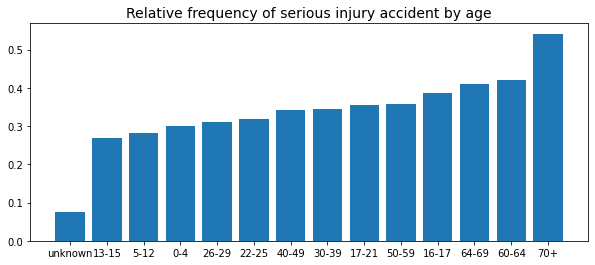

In [13]:
frequency_by_age_group = find_relationship(wrk_accident_pedestrians, 'CATInjuryLevelDesc_person', 'CATAgeGroup_person').sort_values('Serious injury', ascending=False)
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(frequency_by_age_group)),list(reversed(list(frequency_by_age_group['Serious injury']))), tick_label=list(reversed(frequency_by_age_group.index)))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Relative frequency of serious injury accident by age', fontsize=14)
plt.show()

In the code below we verify which day of the week has more accidents with severe injuries. We also see, for each day, the average number of persons involved in accidents and the average number of injuried people.

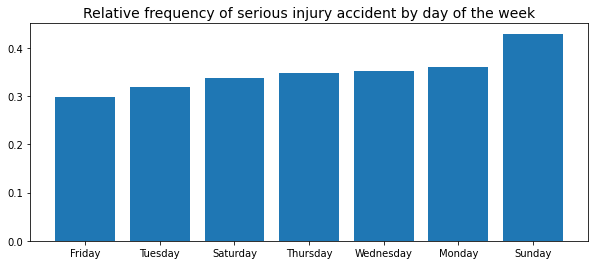

In [14]:
frequency_by_weekday = find_relationship(wrk_accident_pedestrians, 'CATInjuryLevelDesc_person', 'CATDayOfWeek_accident').sort_values('Serious injury', ascending=False)
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(frequency_by_weekday)),list(reversed(list(frequency_by_weekday['Serious injury']))), tick_label=list(reversed(frequency_by_weekday.index)))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Relative frequency of serious injury accident by day of the week', fontsize=14)
plt.show()

In [15]:
wrk_accident_pedestrians.groupby('CATDayOfWeek_accident').agg('mean')[['NUMPersonsInvolved_accident','NUMPersonsInjured_accident']]

NUMPersonsInvolved_accident  NUMPersonsInjured_accident
CATDayOfWeek_accident                                                         
Friday                                    2.294618                    0.365439
Monday                                    2.329412                    0.423529
Saturday                                  2.458182                    0.410909
Sunday                                    2.846491                    0.697368
Thursday                                  2.267101                    0.397394
Tuesday                                   2.215613                    0.364312
Wednesday                                 2.299120                    0.460411

Next, we investigate in what times of the day we have the hightest frequency of seriously injuried pedestrian

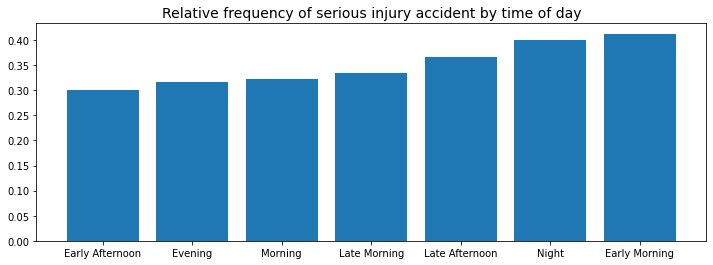

In [16]:
frequency_by_daytime = find_relationship(wrk_accident_pedestrians, 'CATInjuryLevelDesc_person', 'hourgroup').sort_values('Serious injury', ascending=False)
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(range(len(frequency_by_daytime)),list(reversed(list(frequency_by_daytime['Serious injury']))), tick_label=list(reversed(frequency_by_daytime.index)))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Relative frequency of serious injury accident by time of day', fontsize=14)
plt.show()

Below, we investigate what are the 10 streets with the highest number of seriously injuried pedstrians

In [17]:
frequency_by_road = find_relationship(wrk_accident_pedestrians, 'CATInjuryLevelDesc_person', 'CATAccidentRoadGroup', normalize=False).sort_values('Serious injury', ascending=False).iloc[:10]
frequency_by_road

CATAccidentRoadGroup  Other injury  Serious injury  Not injured  Fatality
ST KILDA ROAD                   51              46            3         1
ELIZABETH STREET                80              37            9         0
FLINDERS STREET                 35              35            1         0
LONSDALE STREET                 66              32            3         0
COLLINS STREET                  61              30            4         0
SPENCER STREET                  55              25            2         1
KING STREET                     51              25            5         1
RACECOURSE ROAD                 28              20            2         1
FLEMINGTON ROAD                 19              19            2         0
CLARENDON STREET                30              18            2         0

Next we find in what areas of the city are the seriously injury accidents happening more frequently

In [18]:
#Creating a GeoDataFrame
wrk_accident_pedestrians_gdf = gpd.GeoDataFrame(wrk_accident_pedestrians, geometry=gpd.points_from_xy(wrk_accident_pedestrians['NUMLongitude_node'], wrk_accident_pedestrians['NUMLatitude_node']))
wrk_accident_pedestrians_gdf = wrk_accident_pedestrians_gdf.set_crs( pyproj.CRS.from_user_input('EPSG:4326'))

In [19]:
def create_grid(gdf, n_cells=15):

    '''
    Creates a regular grid over the extent of gdf

    Returns:
        A GeoDataFrame with the cells geometries
    '''
    # total area for the grid
    xmin, ymin, xmax, ymax= gdf.total_bounds
    # how many cells across and down
    cell_size = (xmax-xmin)/n_cells
    # projection of the grid
    #crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
    crs = gdf.crs
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            # bounds
            x1 = x0-cell_size
            y1 = y0+cell_size
            grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
    grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                    crs=crs)
    return grid

In [20]:
def summarize_within(input_gdf, input_summary_gdf, in_fields, out_fields = None, aggfunc='mean'):
    '''
    Overlays a polygon layer with another layer to calculate attribute field statistics about those features (input_summary_gdf) within the polygons (input_gdf).

    Parameters:
        input_gdf: Geodataframe of the polygons in which features will be summarized by.
        input_summary_gdf: Geodataframe of features that will be summarized
        in_fields: name of the fields (in input_summary_gdf) that will be summarized
        out_fields: name that the fields will have after they're summarized
        aggfunc: function that will be used to summarize
    
    Returns:
        A geodataframe with 'input_gdf' polygons and the attributes of 'input_summary_gdf' summarized by each polygon.

    '''
    input_gdf = input_gdf.copy()
    input_summary_gdf = input_summary_gdf.copy()
    if out_fields == None:
        out_fields = in_fields
    #Merges the dwelling points with the input_polygons. A new column "index right" is created. It indicates in what cell the property is within.
    merged = gpd.sjoin(input_summary_gdf, input_gdf, how='left')
    #Now lets count how many properties are within each cell
    dissolve = merged.dissolve(by="index_right", aggfunc=aggfunc) #Dissolve (looks like groupby) by the cell index
    for in_field, out_field in zip(in_fields, out_fields):
        input_gdf.loc[dissolve.index, out_field] = dissolve[in_field].values #Putting number of properties in input_polygons gdf

    return input_gdf.round(2)
    #input_polygons = input_polygons.dropna().round(2)

In [21]:
#Adds boolean columns that indicates if the injury was serious or not
wrk_accident_pedestrians_gdf['Serious injury'] = wrk_accident_pedestrians['CATInjuryLevelDesc_person'].apply(
    lambda level: 1 if level in ['Serious injury', 'Fatality'] else 0)

wrk_accident_pedestrians_gdf['No Serious injury'] = wrk_accident_pedestrians['CATInjuryLevelDesc_person'].apply(
    lambda level: 0 if level in ['Serious injury', 'Fatality'] else 1)

In [22]:
#Creates a regular grid
grid = create_grid(wrk_accident_pedestrians_gdf)
#Summarizes accidents within each grid
summarized_grid = summarize_within(grid ,
    wrk_accident_pedestrians_gdf, 
    in_fields= ['Serious injury','No Serious injury'], 
    aggfunc='sum')
summarized_grid['Serious injury percentage'] = summarized_grid['Serious injury']/(summarized_grid['Serious injury'] + summarized_grid['No Serious injury'])
summarized_grid = summarized_grid.set_crs( pyproj.CRS.from_user_input('EPSG:4326'))
#Considers only grids with more then 1 serious and not serious accidents
summarized_grid = summarized_grid[(summarized_grid['Serious injury']>1) & (summarized_grid['No Serious injury']>1)]

In [23]:
summarized_grid.explore(
     column='Serious injury percentage', # make choropleth based on "BoroName" column
     tooltip=[el for el in summarized_grid.columns if el!='geometry'], # show "BoroName" value in tooltip (on hover)
     scheme="naturalbreaks",
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline,
    )

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;
Findings and Opportunities</b>

This analysis has provided a comprehensive starting point for inspecting the Melbourne Open Data Pedestrian Network dataset and Traffic Accidents (Pedestrians) data.

**We achieved in this analysis:**

- A series of visualisations which illustrate the frequency, timing and basic characteristics of pedestrian accidents occurring in Melbourne between the years 2008 and 2020
- A series of map visualisations which illustrate the precise location of where pedestrian accidents have occurred and a means to visually compare the locations to the pedestrian path network


**We learned from this analysis:**

- How to interpret, analyse and visualise JSON files
- How to convert JSON files to geopandas dataframe for easier analysis, filtering and efficiency
- How to create geographical maps with JSON files and dataframes to display geographical features
- As a preliminary view, we observed that a majority of pedestrian accidents did occurr on 'High-Traffic' pedestrian network routes

    At a broad level:
    
    The total number of pedestrian accidents where pedestrians have been seriously of fatally injured has been reducing over time between the years of 2017 and 2019 (excluding the year 2020 as it was under-developed with only 3 months of data). More than 60 pedestrians in 2017 to less than 30 in 2019. This appears to be a positive and optimistic trend.

    Overall, the week days of Wednesday and Friday appear to have the highest numbers of seriously and fatally injured pedestrians. Separate to this Wednesday afternoons & evening, Friday evening & night and Sunday early morning indicate the highest numbers of accidents involving pedestrians.

    The top three roads with the higest number of seriously injured pedestrian include St Kilda Road, Elizabeth Street and Flinders Street.

**Observations for further opportunities**

- What are the traffic accident circumstances? Are pedestrians being struck by cars an increasing or decreasing problem?
- Do accidents co-occur with road-works, weather events or other disruptive or social events?
- Report on sections of footpath and roadway where higher accident rates are observed
- Part 2 of the Pedestrian Network and Road Safety exploratory data analysis will dive deeper into the timing, geography, circumstance and 'hotspots' of pedestrian accidents.


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black"><b>&emsp;
References</b>

[1] Thompson Road North Geelong Road Safety Improvements https://regionalroads.vic.gov.au/map/barwon-south-west-improvements/thompson-road-safety-improvements

[2] Victorian 'Crash-Stat's dataset https://discover.data.vic.gov.au/dataset/crash-stats-data-extract/resource/392b88c0-f010-491f-ac92-531c293de2e9

[3] Pedestrian Routes Dataset https://data.melbourne.vic.gov.au/Transport/Pedestrian-Network/4id4-tydi


**Technical References**

[4] Accessing geoJSON data https://stackoverflow.com/questions/48263802/finding-location-using-geojson-file-using-python

[5] Accessing geoJSON data https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

[6] Visualising a geoJSON dataset https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays

[7] Visualising categorised data on a map https://www.geeksforgeeks.org/python-adding-markers-to-volcano-locations-using-folium-package/

[8] Creating point plot group layers with folium https://towardsdatascience.com/creating-an-interactive-map-of-wildfire-data-using-folium-in-python-7d6373b6334a

[9] Ideas for further opportunities - Time Series Analysis https://geohackweek.github.io/ghw2018_web_portal_inlandwater_co2/InteractiveTimeSeries.html

In [ ]:
!jupyter nbconvert --to html usecase-pedestriansafety-part1.ipynb

[NbConvertApp] Converting notebook usecase-pedestriansafety-part1.ipynb to html
[NbConvertApp] Writing 98145854 bytes to usecase-pedestriansafety-part1.html
